**Описание проекта**

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Описание данных

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/datasets/insurance.csv', decimal = ',')

In [ ]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                5000 non-null   int64 
 1   Возраст            5000 non-null   object
 2   Зарплата           5000 non-null   object
 3   Члены семьи        5000 non-null   int64 
 4   Страховые выплаты  5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


In [ ]:
df['Возраст'] = pd.to_numeric(df['Возраст'])
df['Зарплата'] = pd.to_numeric(df['Зарплата'])

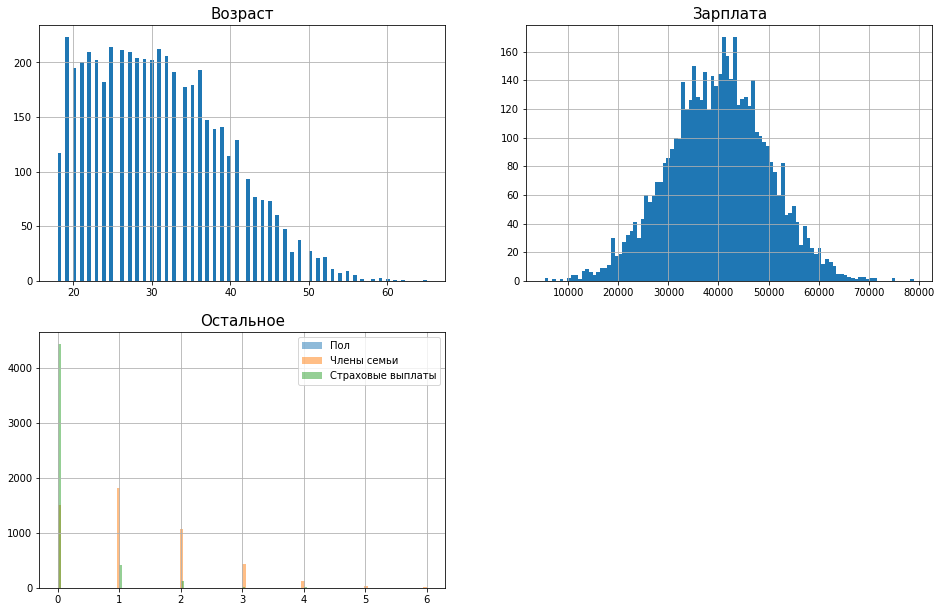

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(16, 16))

# Вывод графиков
plt.subplot(3, 2, 1)
df['Возраст'].hist(bins=100)
plt.title('Возраст', fontsize=15)

plt.subplot(3, 2, 2)
df['Зарплата'].hist(bins=100)
plt.title('Зарплата', fontsize=15)

plt.subplot(3, 2, 3)
df['Пол'].hist(bins=100, alpha=0.5, label='Пол')
df['Члены семьи'].hist(bins=100, alpha=0.5, label='Члены семьи')
df['Страховые выплаты'].hist(bins=100, alpha=0.5, label='Страховые выплаты')
plt.title('Остальное', fontsize=15)
plt.legend()

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Доказательство: 
Начну доказательство с допущени, что:  
$$ a_1 = a$$
    ,    где  $ a_1 = X_1 w_1 $ и $ a = X w $,   тогда  
$$ X_1 w_1 = X w $$
    . Вспомним, что $X_1 = XP$: 
$$ X P w_1 = X w $$
    . Мы знаем, что $ w_1 = (X_1^T X_1)^{-1} X_1^T y = ((XP)^T XP)^{-1} (XP)^T y $, а $ w = (X^T X)^{-1} X^T y $. Тогда уравнение приобретает вид:
$$ X P ((XP)^T XP)^{-1} (XP)^T y = X (X^T X)^{-1} X^T y $$. 
    
Раскрою $ (XP)^T $:    
$$ X P (P^T X^T XP)^{-1} (XP)^T y = X (X^T X)^{-1} X^T y $$
Раскрываю $ (P^T X^T XP)^{-1} $ на $ P^{-1} $ и $ (P^T X^T X)^{-1}$ , а так же раскрываю $ (XP)^T $
$$ X P P^{-1} (P^T X^T X)^{-1} P^T X^T y = X (X^T X)^{-1} X^T y $$
Заметим, что $ P P^{-1} = I = 1 $ и разложу оставшуюся скобку $ (P^T X^T X)^{-1} $ на $ (X^T X)^{-1} $ и $ (P^T)^{-1} $
$$ X (X^T X)^{-1} (P^T)^{-1} P^T X^T y = X (X^T X)^{-1} X^T y $$
Так же замечу, что $ (P^T)^{-1} P^T = I = 1 $. Тогда получаем правую часть равную левой:
$$ X (X^T X)^{-1} X^T y = X (X^T X)^{-1} X^T y $$. 
чтд



In [ ]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(((X.T) @ X)) @ (X.T)) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [ ]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286668


In [ ]:
encoder = np.random.rand(4,4)
np.linalg.inv(encoder)

array([[  1.21319662,  -0.13556401,  -1.24636897,   0.80836653],
       [ -1.0950115 ,   0.06492103,   0.25794617,   1.42429275],
       [ -2.4823803 ,  -0.70374669,  18.03881493,  -9.36038449],
       [  2.30311741,   1.74616385, -14.14104413,   5.76450067]])

In [ ]:
model = LinearRegression()
model.fit(features @ encoder, target)
predictions = model.predict(features @ encoder)
print(r2_score(target, predictions))

0.4249455028242676


**Ответ:** 

Качество работы модели после домножения на обратимую матрицу не изменилось

**Обоснование:** 

Для шифрования информации могут использоваться аналитические преобразования. Наибольшее распространение получили методы шифрования, основанные на использовании матричной алгебры. Зашифрование k-го блока исходной информации, представленного в виде вектора Bk = ||bj||, осуществляется путем перемножения матрицы-ключа А = ||aij|| и вектора Bk. В результате перемножения получается блок шифртекста в виде вектора Ck = ||ci|| , где элементы вектора Ck определяются по формуле:

Предсказания:

$$
Ci = \sum(aij*bj)
$$

Расшифрование информации осуществляется путем последовательного перемножения векторов Ck и матрицы A-1, обратной матрице A.



## Алгоритм преобразования

**Алгоритм**

Шифрование:
1. Придумаем квадратную матрицу-шифр А, размер стороны которой равен количеству признаков.
2. Проверяем наличие обратной матрицы А_1.
3. Шифруем данные путем перемножения матрицы признаков с матрицей-шифром.

Дешифрование:
1. Умножаем матрицу зашифрованных данных на обратную матрицу-шифр А_1.



**Обоснование**

Обратная матрица задается как:

$$
А*А^{-1} = I
$$

Тогда закодированные признаки Х по формуле:
$$
А*Х = У, 
$$
можно найти с помощью обратной матрицы:
$$
У*А^{-1} = Х
$$

## Проверка алгоритма

In [ ]:
A = np.array([
    [5,1,3,7], 
    [3,5,7,1],
    [1,7,5,3],  
    [7,3,1,5]])

A_1 = np.linalg.inv(A)
A_1

array([[-0.078125,  0.109375, -0.140625,  0.171875],
       [-0.140625, -0.078125,  0.171875,  0.109375],
       [ 0.109375,  0.171875, -0.078125, -0.140625],
       [ 0.171875, -0.140625,  0.109375, -0.078125]])

In [ ]:
# Модель до преобразования
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286668


In [ ]:
# Модель после преобразования
model_1 = LinearRegression()
model_1.fit(features @ A, target)
predictions_1 = model_1.predict(features @ A)
print(r2_score(target, predictions_1))

0.424945502866686


Модели показали одинаковое качество на шифрованных и не шифрованных данных, значит алгоритм справляется со своей задачей. Хочется его усложнить, но я не придумала как это сделать. Простые линейные операции или повторное умножение на матрицу приведут лишь к измению изначального множетеля, но мы можем взять его случайным, соответственно усложнение алгоритма не происходит.